In [206]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [207]:
#train_set
li = glob("2019 Punctuality Statistics Full Analysis/*")
li2 = glob("2020 Punctuality Statistics Full Analysis/*")
li.extend(li2)
dfs = [pd.read_csv(i) for i in li]

#test_set
li_vaild = glob("2022 Punctuality Statistics Full Analysis/*")
dfs_vaild = [pd.read_csv(i) for i in li_vaild]

In [208]:
df_train = pd.concat(dfs)
#Remove private charter
df_train = df_train[df_train["scheduled_charter"]=="S"]
#remove empty values
df_train = df_train[df_train["number_flights_matched"] != 0]
df_train

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
0,30/06/2022 17:57,201901,ABERDEEN,POLAND,GDANSK,WIZZ AIR,S,16,0,0,...,12.500000,0.000000,0.000000,0.0,0.0,0.000000,10.937500,18,80.000000,11.000000
2,30/06/2022 17:57,201901,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),FLYBE LTD,S,40,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.750000,60,87.096774,5.683333
3,30/06/2022 17:57,201901,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,FLYBE LTD,S,138,0,0,...,0.724638,0.000000,0.000000,0.0,0.0,0.000000,5.043478,145,90.410959,4.000000
4,30/06/2022 17:57,201901,ABERDEEN,UNITED KINGDOM,BRISTOL,BMI REGIONAL,S,52,0,2,...,3.703704,3.703704,3.703704,0.0,0.0,3.703704,26.923077,57,67.796610,23.403509
5,30/06/2022 17:57,201901,ABERDEEN,UNITED KINGDOM,CARDIFF WALES,FLYBE LTD,S,1,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,47,67.924528,15.744681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,17/02/2021 13:16,202012,SOUTHEND,SPAIN,MALAGA,RYANAIR,S,8,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4.500000,32,75.000000,12.375000
2860,17/02/2021 13:16,202012,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,ABERDEEN,EASTERN AIRWAYS,S,44,0,0,...,0.000000,2.272727,0.000000,0.0,0.0,0.000000,6.909091,1,100.000000,0.000000
2862,17/02/2021 13:16,202012,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),EASTERN AIRWAYS,S,14,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,7.500000,0,0.000000,0.000000
2866,17/02/2021 13:16,202012,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,HUMBERSIDE,EASTERN AIRWAYS,S,42,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,2.325581,4.000000,1,100.000000,0.000000


In [209]:
df_vaild = pd.concat(dfs_vaild)
#Remove private charter
df_vaild = df_vaild[df_vaild["scheduled_charter"]=="S"]
#remove empty values
df_vaild = df_vaild[df_vaild["number_flights_matched"] != 0]
df_vaild

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
0,17/03/2022 17:13,202201,ABERDEEN,HUNGARY,BUDAPEST,WIZZ AIR,S,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,0,0.000000,0.000000
3,17/03/2022 17:13,202201,ABERDEEN,POLAND,GDANSK,WIZZ AIR,S,8,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,16.875000,1,0.000000,29.000000
4,17/03/2022 17:13,202201,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,S,34,0,0,...,0.000000,8.823529,0.000000,0.000000,0.0,0.000000,20.029412,0,0.000000,0.000000
5,17/03/2022 17:13,202201,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,LOGANAIR LTD,S,63,0,0,...,3.174603,0.000000,0.000000,0.000000,0.0,0.000000,6.285714,0,0.000000,0.000000
6,17/03/2022 17:13,202201,ABERDEEN,UNITED KINGDOM,BRISTOL,LOGANAIR LTD,S,40,0,1,...,4.878049,0.000000,0.000000,0.000000,0.0,2.439024,6.800000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,28/02/2023 09:17,202212,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,ABERDEEN,LOGANAIR LTD,S,69,0,4,...,6.849315,0.000000,5.479452,1.369863,0.0,5.479452,30.565217,86,77.906977,17.941860
2774,28/02/2023 09:17,202212,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,S,32,0,2,...,2.941176,0.000000,5.882353,0.000000,0.0,5.882353,20.625000,32,87.500000,9.156250
2782,28/02/2023 09:17,202212,TEESSIDE INTERNATIONAL AIRPORT,IRISH REPUBLIC,DUBLIN,LOGANAIR LTD,S,6,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.666667,0,0.000000,0.000000
2783,28/02/2023 09:17,202212,TEESSIDE INTERNATIONAL AIRPORT,NETHERLANDS,AMSTERDAM,KLM,S,104,0,2,...,2.830189,0.943396,0.000000,0.000000,0.0,1.886792,8.403846,30,76.666667,6.500000


<AxesSubplot:>

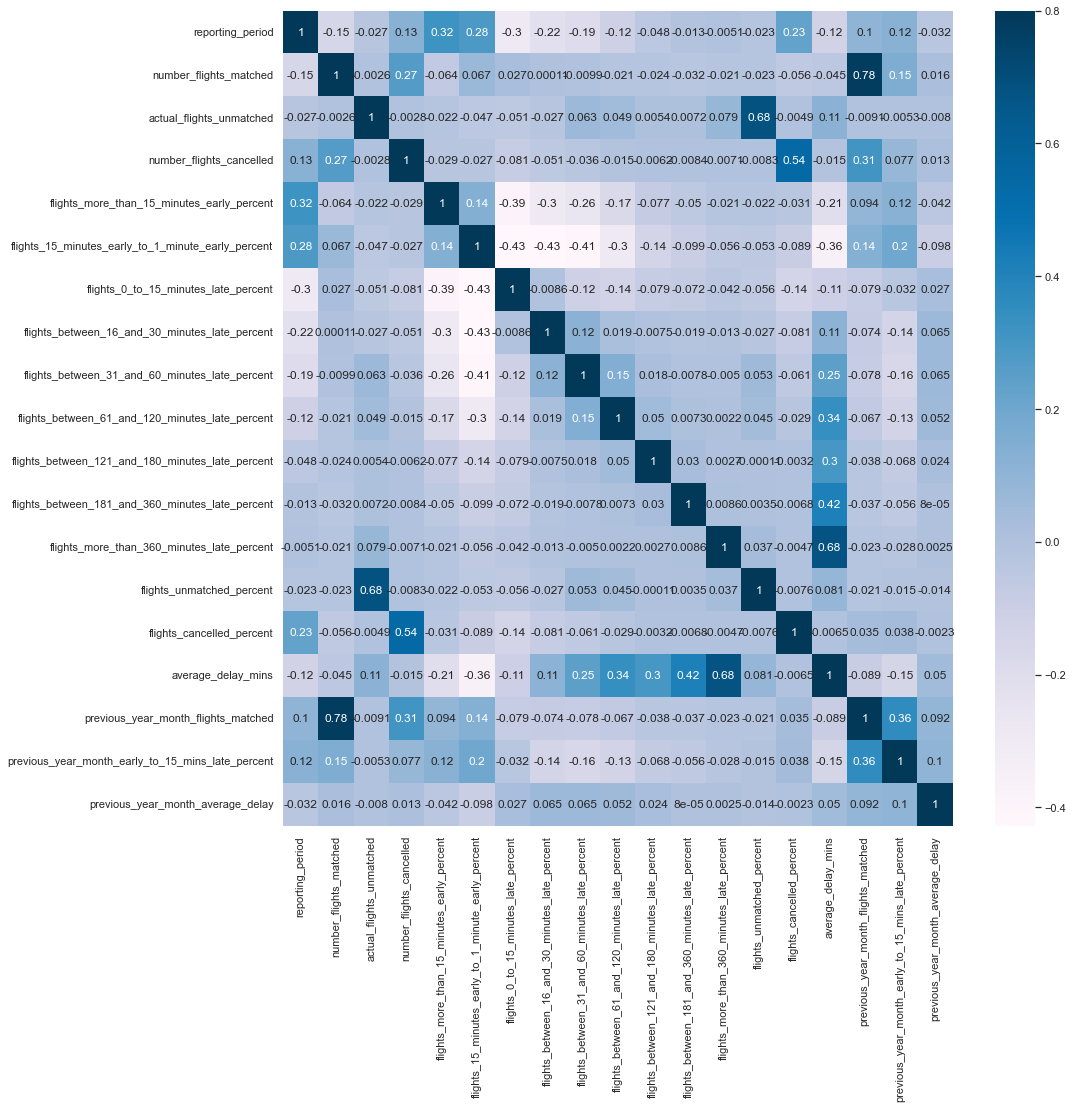

In [210]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize =(15,15))
sns.heatmap(df_train.corr(),vmax=0.8,cmap='PuBu',annot=True,linecolor='b')

In [211]:
df_train.describe()

,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
count,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000,44937.000000
mean,201940.520974,57.480206,0.021452,0.867837,10.128693,34.733733,31.451356,9.717400,7.017000,3.540230,0.893782,0.524436,0.148582,0.077733,1.766596,13.849377,61.218684,56.617617,12.366548
std,47.369139,75.709853,0.483604,3.302983,13.076053,20.109457,18.100784,11.896441,11.372169,8.674556,4.630880,4.107336,2.270682,1.660813,6.733973,25.367405,88.233506,34.273822,15.664111
min,201901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201905.000000,16.000000,0.000000,0.000000,0.000000,21.428571,20.689655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,33.333333,1.923077
50%,201909.000000,28.000000,0.000000,0.000000,5.555556,33.974359,31.666667,7.317073,3.896104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.300000,27.000000,70.000000,9.555556
75%,202002.000000,62.000000,0.000000,0.000000,14.754098,48.333333,41.176471,13.636364,9.677419,4.242424,0.000000,0.000000,0.000000,0.000000,0.000000,16.750000,70.000000,83.018868,17.000000
max,202012.000000,801.000000,32.000000,92.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,72.727273,97.872340,1454.000000,801.000000,100.000000,755.000000


In [212]:
df_train = df_train.sort_values(["airline_name","origin_destination","reporting_period"])
df_vaild = df_vaild.sort_values(["airline_name","origin_destination","reporting_period"])
df_train

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
4044,22/10/2019 17:30,201908,SOUTHAMPTON,UNITED KINGDOM,LIVERPOOL (JOHN LENNON),2 EXCEL AVIATION LTD T/A THE BLADES BROADSWORD...,S,2,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.500000,0,0.000000,0.000000
3442,30/06/2022 17:59,201902,SOUTHAMPTON,SPAIN(CANARY ISLANDS),TENERIFE (SURREINA SOFIA),2 EXCEL AVIATION LTD T/A THE BLADES BROADSWORD...,S,1,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,33.000000,0,0.000000,0.000000
4179,05/08/2019 16:10,201905,MANCHESTER,SLOVENIA,LJUBLJANA,ADRIA AIRWAYS,S,2,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,27.500000,2,100.000000,7.500000
4142,30/08/2019 14:01,201906,MANCHESTER,SLOVENIA,LJUBLJANA,ADRIA AIRWAYS,S,10,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,15.000000,8,87.500000,16.250000
4259,20/09/2019 11:59,201907,MANCHESTER,SLOVENIA,LJUBLJANA,ADRIA AIRWAYS,S,6,0,0,...,16.666667,0.0,16.666667,0.0,0.0,0.000000,50.666667,10,80.000000,8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,08/12/2020 15:24,202010,LUTON,GREECE,ZAKINTHOS,WIZZ AIR UK LTD,S,8,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,2.125000,0,0.000000,0.000000
2079,22/01/2021 17:02,202011,LUTON,GREECE,ZAKINTHOS,WIZZ AIR UK LTD,S,4,0,1,...,0.000000,0.0,0.000000,0.0,0.0,20.000000,0.000000,0,0.000000,0.000000
1727,30/06/2022 17:57,201901,GATWICK,ICELAND,KEFLAVIK,WOW AIR,S,88,0,1,...,2.247191,0.0,0.000000,0.0,0.0,1.123596,7.772727,79,38.461538,37.430380
1828,30/06/2022 17:59,201902,GATWICK,ICELAND,KEFLAVIK,WOW AIR,S,80,0,0,...,2.500000,0.0,0.000000,0.0,0.0,0.000000,12.137500,92,45.000000,34.510870


In [213]:
#aggregation reporting_airport
def process(x):

    average_delay = sum(x["number_flights_matched"]*x["average_delay_mins"])/sum(x["number_flights_matched"])
    return average_delay
df_train = df_train.groupby(["airline_name","origin_destination","reporting_period"]).apply(process)
df_vaild = df_vaild.groupby(["airline_name","origin_destination","reporting_period"]).apply(process)

df_train = df_train.reset_index()
df_train.rename(columns={0:"agg_average_delay"},inplace=True)
df_vaild = df_vaild.reset_index()
df_vaild.rename(columns={0:"agg_average_delay"},inplace=True)


In [214]:
#modify reporting_period
def process(x):
    x = str(x)
    x = x[2:]
    x = int(x)
    x = x/1000
    return x
df_train["reporting_period"] = df_train["reporting_period"].apply(process)
df_vaild["reporting_period"] = df_vaild["reporting_period"].apply(process)
df_train

,airline_name,origin_destination,reporting_period,agg_average_delay
0,2 EXCEL AVIATION LTD T/A THE BLADES BROADSWORD...,LIVERPOOL (JOHN LENNON),1.908,1.500000
1,2 EXCEL AVIATION LTD T/A THE BLADES BROADSWORD...,TENERIFE (SURREINA SOFIA),1.902,33.000000
2,ADRIA AIRWAYS,LJUBLJANA,1.905,27.500000
3,ADRIA AIRWAYS,LJUBLJANA,1.906,15.000000
4,ADRIA AIRWAYS,LJUBLJANA,1.907,50.666667
...,...,...,...,...
20214,WIZZ AIR UK LTD,ZAKINTHOS,2.010,2.125000
20215,WIZZ AIR UK LTD,ZAKINTHOS,2.011,0.000000
20216,WOW AIR,KEFLAVIK,1.901,7.772727
20217,WOW AIR,KEFLAVIK,1.902,12.137500


In [215]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20219 entries, 0 to 20218
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   airline_name        20219 non-null  object 
 1   origin_destination  20219 non-null  object 
 2   reporting_period    20219 non-null  float64
 3   agg_average_delay   20219 non-null  float64
dtypes: float64(2), object(2)
memory usage: 632.0+ KB


In [216]:
df_train[['airline_name','origin_destination']] = df_train[['airline_name','origin_destination']].astype("category")
df_vaild[['airline_name','origin_destination']] = df_vaild[['airline_name','origin_destination']].astype("category")

In [217]:
y = df_train['agg_average_delay']
X = df_train[['airline_name','origin_destination', 'reporting_period']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_vaild = df_vaild[['airline_name','origin_destination', 'reporting_period']]
y_vaild = df_vaild['agg_average_delay']

In [224]:

import xgboost as xgb
model =LGBMRegressor(objective='regression', num_leaves=60, learning_rate=0.01, n_estimators=2000,n_jobs=10,metric='mse')
model.fit(X_train,y_train,eval_set=[(X_test, y_test)])
# model = xgb.XGBRegressor(max_depth = 400, min_child_weight=0.5, subsample = 1, eta = 0.3, num_round = 1000, seed = 1)
# model.fit(X_train,y_train)
result = model.predict(X_test)
MSE = mean_squared_error(result,y_test)
testMSE=MSE
print("testMSE",testMSE)

D:\program_temp\Anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
D:\program_temp\Anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's l2: 1312.39
[2]	valid_0's l2: 1311.11
[3]	valid_0's l2: 1309.88
[4]	valid_0's l2: 1308.71
[5]	valid_0's l2: 1307.36
[6]	valid_0's l2: 1306.07
[7]	valid_0's l2: 1304.86
[8]	valid_0's l2: 1303.78
[9]	valid_0's l2: 1302.73
[10]	valid_0's l2: 1301.67
[11]	valid_0's l2: 1300.54
[12]	valid_0's l2: 1299.42
[13]	valid_0's l2: 1298.28
[14]	valid_0's l2: 1297.15
[15]	valid_0's l2: 1296.12
[16]	valid_0's l2: 1295.18
[17]	valid_0's l2: 1294.18
[18]	valid_0's l2: 1293.12
[19]	valid_0's l2: 1292.18
[20]	valid_0's l2: 1291.24
[21]	valid_0's l2: 1290.39
[22]	valid_0's l2: 1289.41
[23]	valid_0's l2: 1288.44
[24]	valid_0's l2: 1287.36
[25]	valid_0's l2: 1286.47
[26]	valid_0's l2: 1285.55
[27]	valid_0's l2: 1284.51
[28]	valid_0's l2: 1283.48
[29]	valid_0's l2: 1282.51
[30]	valid_0's l2: 1281.68
[31]	valid_0's l2: 1280.88
[32]	valid_0's l2: 1279.93
[33]	valid_0's l2: 1278.95
[34]	valid_0's l2: 1278.01
[35]	valid_0's l2: 1277.17
[36]	valid_0's l2: 1276.36
[37]	valid_0's l2: 1275.56
[38]	valid

In [219]:
X_vaild

,airline_name,origin_destination,reporting_period
0,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.202
1,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.203
2,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.204
3,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.205
4,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.206
...,...,...,...
12012,WIZZ AIR UK LTD,ZAKINTHOS,2.206
12013,WIZZ AIR UK LTD,ZAKINTHOS,2.207
12014,WIZZ AIR UK LTD,ZAKINTHOS,2.208
12015,WIZZ AIR UK LTD,ZAKINTHOS,2.209


In [17]:
#predict 2022
result = model.predict(X_vaild)
result
df_vaild["predict"] = result
df_vaild

,airline_name,origin_destination,reporting_period,agg_average_delay,predict
0,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.202,5.823529,8.813035
1,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.203,2.457143,8.813035
2,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.204,7.913726,8.813035
3,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.205,12.559567,8.813035
4,(ITA) ITALIA TRASPOTO AEREO,MILAN (LINATE),2.206,21.541045,8.813035
...,...,...,...,...,...
12012,WIZZ AIR UK LTD,ZAKINTHOS,2.206,51.700000,21.344640
12013,WIZZ AIR UK LTD,ZAKINTHOS,2.207,41.888889,21.344640
12014,WIZZ AIR UK LTD,ZAKINTHOS,2.208,32.444444,21.344640
12015,WIZZ AIR UK LTD,ZAKINTHOS,2.209,38.187500,21.344640
